## Selore Retails

Selore Retails is a popular electronics retail chain that specializes in the sale of mobile phones, tablets, laptops, and other related accessories. The company was founded in 2022 and has since grown to become one of the largest retailers of mobile phones and related products in the country.

In [38]:
# import Library

# data analysis
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# data preprocessing
from sklearn.preprocessing import LabelEncoder

# machine learning
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# evaluation
from sklearn.metrics import silhouette_score, homogeneity_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the data
df= pd.read_csv(r"C:\Users\FOLASADE\OneDrive\Desktop\Learning\DataSci Learn 10Alytics\PDF for Practice\1Python Pract\Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.dtypes

CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

In [11]:
df.shape

(200, 5)

In [12]:
df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

### Data Cleaning and Preprocessing

##### Data Dictionary
- CustomerID : Unique identifier
- Gender : Customer gender(Male/Female)
- Age : Customer age
- Annual_Income : Income per year
- Spending_Score : Denotes how well the cust make purchase

In [14]:
# check for duplicates
print(df.duplicated().sum())

0


### Exploratory Data Analysis

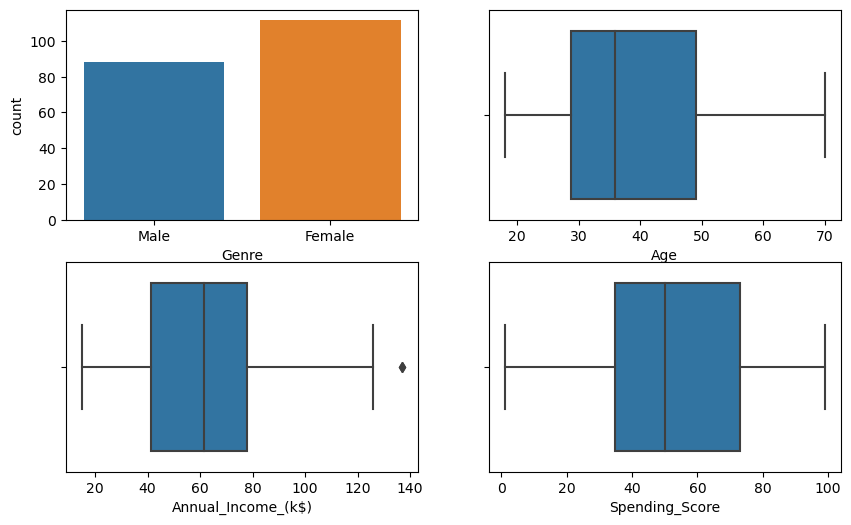

In [23]:
fig, axs= plt.subplots(nrows=2, ncols=2, figsize=(10,6))

sns.countplot(x=df["Genre"], ax=axs[0,0])
sns.boxplot(x=df["Age"], ax=axs[0,1])
sns.boxplot(x=df["Annual_Income_(k$)"], ax=axs[1,0])
sns.boxplot(x=df["Spending_Score"], ax=axs[1,1]);

### Data Preprocessing

In [25]:
# label encoding /transforming the data
encoder= LabelEncoder()

# looping for columns except survive
for c in df.columns[1:]:
    if(df[c].dtype=="object"):
        df[c]= encoder.fit_transform(df[c])
    else:
        df[c] = df[c]
        
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [26]:
# drop Customer ID
df.drop("CustomerID", axis=1, inplace=True)
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


After applying the K Means clustering algorithms, we can determine the optimal number of clusters by using the Elbow method.
This method involve plotting the Within Cluster Sum of Square (WCSS) against the number of clusters (K) and selecting the value of K where the rate of decrease in WCSS, indicating that 3 is the optimal number of cluster in this case. Although the optimal value is K, may not always be apparent from the graph with practice, it becomes easier to identify the elbow point where the rate of decrease in WCSS slows down significantly.

![Alt text](https://i.imgur.com/gi9p7V5.png)

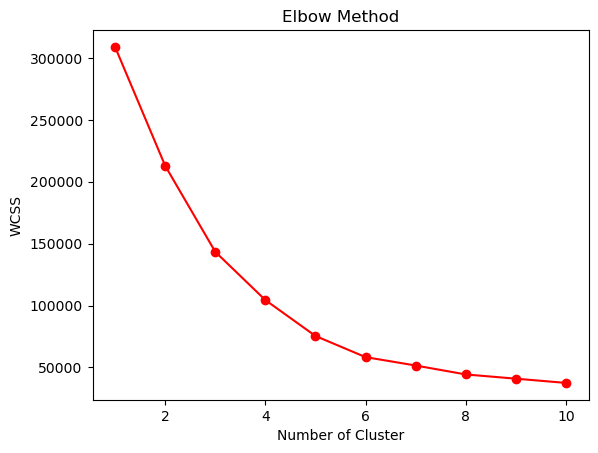

In [30]:
# determine optimal number of clusters
WCSS=[]
for i in range(1, 11):
    kmeans= KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(df)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,11), WCSS, color="red", marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

Based on the results obtained from the Elbow method using K-Means, we will categorize the customers into five distinct clusters. These clusters will group customers based on similarities in their spending patterns.

In [35]:
# fit Kmeans clustering Model 
kmeans= KMeans(n_clusters=5, init="k-means++", random_state=42)
kmeans.fit(df)

#Add cluster label to data
df["Cluster"]=kmeans.labels_

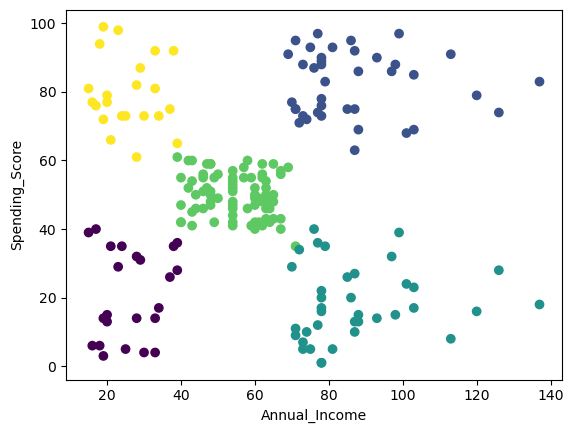

0.44493777835059417

In [37]:
# visualize cluster result
plt.scatter(df["Annual_Income_(k$)"], df["Spending_Score"], c=df["Cluster"], label="Centroids")
plt.xlabel("Annual_Income")
plt.ylabel("Spending_Score")
plt.show()

#calculate silhouette_score
silhouette_score(df, kmeans.labels_)

The objective is to group customers based on their spending habits using the K-Means algorithm. By applying the K-Means algorithm, we can predict customer spending behavior and cluster them into distinct groups based on their similarities in spending patterns